# Final Project - Part 2

**Group Members:**
1. Akshya Yadav
2. Deepanshu Malhotra
3. Harsh Baberwal
4. Shruti Jain

##### Importing required packages

In [1]:
import pandas as pd
import numpy as np
import altair as alt
from vega_datasets import data

import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

import requests
import requests, zipfile, io

##### Downloading and extracting data from zip file 
 
 Link used for this code - https://stackoverflow.com/questions/66108822/download-zipped-csv-file-from-server-link-and-read-into-pandas


In [2]:
zip_file_url = "https://s3-us-gov-west-1.amazonaws.com/cg-d4b776d0-d898-4153-90c8-8336f86bdfec/hate_crime.zip"
response = requests.get(zip_file_url)
with zipfile.ZipFile(io.BytesIO(response.content)) as myzip:
    with myzip.open(myzip.namelist()[0]) as myfile:
        hc_cases = pd.read_csv(myfile)


/Users/harshbaberwal/opt/anaconda3/envs/DataViz/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3552: DtypeWarning: Columns (19) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


*Extracting the state name and id (as created by census and used in altair geographic example plots to map data to states) from altair state populution, engineers and hurricanes count data*

In [3]:
temp = data.population_engineers_hurricanes()
census_state_mapping = temp[['state','id']]

In [4]:
census_state_mapping.head()

,state,id
0,Alabama,1
1,Alaska,2
2,Arizona,4
3,Arkansas,5
4,California,6


## Quick data check

In [5]:
hc_cases.columns

Index(['INCIDENT_ID', 'DATA_YEAR', 'ORI', 'PUB_AGENCY_NAME', 'PUB_AGENCY_UNIT',
       'AGENCY_TYPE_NAME', 'STATE_ABBR', 'STATE_NAME', 'DIVISION_NAME',
       'REGION_NAME', 'POPULATION_GROUP_CODE', 'POPULATION_GROUP_DESC',
       'INCIDENT_DATE', 'ADULT_VICTIM_COUNT', 'JUVENILE_VICTIM_COUNT',
       'TOTAL_OFFENDER_COUNT', 'ADULT_OFFENDER_COUNT',
       'JUVENILE_OFFENDER_COUNT', 'OFFENDER_RACE', 'OFFENDER_ETHNICITY',
       'VICTIM_COUNT', 'OFFENSE_NAME', 'TOTAL_INDIVIDUAL_VICTIMS',
       'LOCATION_NAME', 'BIAS_DESC', 'VICTIM_TYPES', 'MULTIPLE_OFFENSE',
       'MULTIPLE_BIAS'],
      dtype='object')

In [6]:
hc_cases.head()

,INCIDENT_ID,DATA_YEAR,ORI,PUB_AGENCY_NAME,PUB_AGENCY_UNIT,AGENCY_TYPE_NAME,STATE_ABBR,STATE_NAME,DIVISION_NAME,REGION_NAME,...,OFFENDER_RACE,OFFENDER_ETHNICITY,VICTIM_COUNT,OFFENSE_NAME,TOTAL_INDIVIDUAL_VICTIMS,LOCATION_NAME,BIAS_DESC,VICTIM_TYPES,MULTIPLE_OFFENSE,MULTIPLE_BIAS
0,3015,1991,AR0040200,Rogers,NaN,City,AR,Arkansas,West South Central,South,...,White,NaN,1,Intimidation,1.0,Highway/Road/Alley/Street/Sidewalk,Anti-Black or African American,Individual,S,S
1,3016,1991,AR0290100,Hope,NaN,City,AR,Arkansas,West South Central,South,...,Black or African American,NaN,1,Simple Assault,1.0,Highway/Road/Alley/Street/Sidewalk,Anti-White,Individual,S,S
2,43,1991,AR0350100,Pine Bluff,NaN,City,AR,Arkansas,West South Central,South,...,Black or African American,NaN,1,Aggravated Assault,1.0,Residence/Home,Anti-Black or African American,Individual,S,S
3,44,1991,AR0350100,Pine Bluff,NaN,City,AR,Arkansas,West South Central,South,...,Black or African American,NaN,2,Aggravated Assault;Destruction/Damage/Vandalis...,1.0,Highway/Road/Alley/Street/Sidewalk,Anti-White,Individual,M,S
4,3017,1991,AR0350100,Pine Bluff,NaN,City,AR,Arkansas,West South Central,South,...,Black or African American,NaN,1,Aggravated Assault,1.0,Service/Gas Station,Anti-White,Individual,S,S


In [7]:
hc_cases.shape

(219577, 28)

In [8]:
hc_cases.dtypes

INCIDENT_ID                   int64
DATA_YEAR                     int64
ORI                          object
PUB_AGENCY_NAME              object
PUB_AGENCY_UNIT              object
AGENCY_TYPE_NAME             object
STATE_ABBR                   object
STATE_NAME                   object
DIVISION_NAME                object
REGION_NAME                  object
POPULATION_GROUP_CODE        object
POPULATION_GROUP_DESC        object
INCIDENT_DATE                object
ADULT_VICTIM_COUNT          float64
JUVENILE_VICTIM_COUNT       float64
TOTAL_OFFENDER_COUNT          int64
ADULT_OFFENDER_COUNT        float64
JUVENILE_OFFENDER_COUNT     float64
OFFENDER_RACE                object
OFFENDER_ETHNICITY           object
VICTIM_COUNT                  int64
OFFENSE_NAME                 object
TOTAL_INDIVIDUAL_VICTIMS    float64
LOCATION_NAME                object
BIAS_DESC                    object
VICTIM_TYPES                 object
MULTIPLE_OFFENSE             object
MULTIPLE_BIAS               

In [9]:
hc_cases['OFFENDER_RACE'].unique()

array(['White', 'Black or African American', 'Unknown', 'Multiple',
       'Asian', 'American Indian or Alaska Native',
       'Native Hawaiian or Other Pacific Islander', nan], dtype=object)

In [10]:
hc_cases['VICTIM_TYPES'].value_counts(normalize = True)*100


Individual                                               79.190899
Other                                                     6.234715
Business                                                  4.372043
Religious Organization                                    2.809493
Government                                                2.727517
Society/Public                                            2.309896
Individual;Other                                          0.725486
Unknown                                                   0.599334
Business;Individual                                       0.399860
Individual;Society/Public                                 0.181713
Individual;Religious Organization                         0.101559
Government;Individual                                     0.088352
Law Enforcement Officer                                   0.078788
Financial Institution                                     0.044176
Individual;Unknown                                        0.02

In [11]:
hc_cases['OFFENSE_NAME'].nunique()


353

In [12]:
hc_cases['OFFENSE_NAME'].value_counts(normalize = True)*100

Destruction/Damage/Vandalism of Property                                                            30.410289
Intimidation                                                                                        29.189305
Simple Assault                                                                                      18.999713
Aggravated Assault                                                                                  10.441440
Robbery                                                                                              1.686424
                                                                                                      ...    
Intimidation;Rape;Robbery                                                                            0.000455
Aggravated Assault;Intimidation;Robbery;Simple Assault                                               0.000455
Credit Card/Automated Teller Machine Fraud;False Pretenses/Swindle/Confidence Game;Impersonation     0.000455
Aggravated

In [13]:
hc_cases['BIAS_DESC'].value_counts(normalize = True)*100


Anti-Black or African American                                            34.048193
Anti-Jewish                                                               12.757711
Anti-White                                                                11.473424
Anti-Gay (Male)                                                            9.952773
Anti-Hispanic or Latino                                                    6.389558
                                                                            ...    
Anti-Jewish;Anti-Lesbian (Female);Anti-Multiple Races, Group               0.000455
Anti-Islamic (Muslim);Anti-White                                           0.000455
Anti-Jehovah's Witness;Anti-Other Race/Ethnicity/Ancestry                  0.000455
Anti-Catholic;Anti-Hispanic or Latino                                      0.000455
Anti-Hispanic or Latino;Anti-Native Hawaiian or Other Pacific Islander     0.000455
Name: BIAS_DESC, Length: 279, dtype: float64

In [14]:
print("Data Starting Year:", hc_cases['DATA_YEAR'].min())
print("Data Ending Year:", hc_cases['DATA_YEAR'].max())

Data Starting Year: 1991
Data Ending Year: 2020


In [15]:
print(hc_cases['BIAS_DESC'].str.split(';|\\,', expand = True).loc[:,0].nunique())
hc_cases['BIAS_DESC'].str.split(';|\\,', expand = True).loc[:,0].unique()

35


array(['Anti-Black or African American', 'Anti-White', 'Anti-Jewish',
       'Anti-Arab', 'Anti-Protestant', 'Anti-Other Religion',
       'Anti-Islamic (Muslim)', 'Anti-Gay (Male)', 'Anti-Asian',
       'Anti-Catholic', 'Anti-Heterosexual', 'Anti-Hispanic or Latino',
       'Anti-Other Race/Ethnicity/Ancestry', 'Anti-Multiple Religions',
       'Anti-Multiple Races', 'Anti-Lesbian (Female)', 'Anti-Lesbian',
       'Anti-American Indian or Alaska Native',
       'Anti-Atheism/Agnosticism', 'Anti-Bisexual',
       'Anti-Physical Disability', 'Anti-Mental Disability',
       'Anti-Gender Non-Conforming', 'Anti-Female', 'Anti-Transgender',
       'Anti-Native Hawaiian or Other Pacific Islander', 'Anti-Male',
       "Anti-Jehovah's Witness", 'Anti-Mormon', 'Anti-Buddhist',
       'Anti-Sikh', 'Anti-Other Christian', 'Anti-Hindu',
       'Anti-Eastern Orthodox (Russian',
       "Unknown (offender's motivation not known)"], dtype=object)

# Vizualization 1st Iteration
- Not interesting

### Data Prep for the Visualization

In [16]:
# hc_for_plot = hc_cases.loc[:,['OFFENDER_RACE', 'DIVISION_NAME']]
hc_for_plot = hc_cases.loc[:,['DATA_YEAR', 'OFFENDER_RACE', 'DIVISION_NAME', 'OFFENSE_NAME','INCIDENT_ID']]


In [17]:
hc_for_plot.head()

,DATA_YEAR,OFFENDER_RACE,DIVISION_NAME,OFFENSE_NAME,INCIDENT_ID
0,1991,White,West South Central,Intimidation,3015
1,1991,Black or African American,West South Central,Simple Assault,3016
2,1991,Black or African American,West South Central,Aggravated Assault,43
3,1991,Black or African American,West South Central,Aggravated Assault;Destruction/Damage/Vandalis...,44
4,1991,Black or African American,West South Central,Aggravated Assault,3017


In [18]:
hc_for_plot['DIVISION_NAME'].value_counts(normalize = True)*100

Pacific               22.608015
Middle Atlantic       20.259863
East North Central    13.919035
South Atlantic        12.010365
New England            8.324187
Mountain               7.903378
West North Central     5.849884
West South Central     5.313853
East South Central     3.615133
Other                  0.194009
U.S. Territories       0.002277
Name: DIVISION_NAME, dtype: float64

##### Dropping the Division Names is  'Other' or 'U.S. Territories'
**Note:** *These account for only ~0.19% of the data and might make the heatmap skewed later on.*

In [19]:
hc_for_plot = hc_for_plot[~hc_for_plot['DIVISION_NAME'].isin(['Other', 'U.S. Territories'])]

In [20]:
hc_for_plot['OFFENDER_RACE'].value_counts(normalize = True)*100

Unknown                                      44.337048
White                                        39.339923
Black or African American                    12.993438
Multiple                                      2.016648
Asian                                         0.724241
American Indian or Alaska Native              0.551737
Native Hawaiian or Other Pacific Islander     0.036965
Name: OFFENDER_RACE, dtype: float64

##### Dropping the rows where offender race is  'American Indian or Alaska Native' and 'Native Hawaiian or Other Pacific Islander'  
**Note:** *These account for only ~0.58% of the data and might make the heatmap skewed later on.*

In [21]:
top_offender_races = ['Unknown', 'White', 'Black or African American', 'Multiple', 'Asian']

hc_for_plot['OFFENDER_RACE_CLEAN'] = hc_for_plot['OFFENDER_RACE'].apply(lambda x: 
                                                                        x if x in top_offender_races else 'Others')

In [22]:
hc_for_plot = hc_for_plot.loc[hc_for_plot['OFFENDER_RACE_CLEAN'] != 'Others',:]

##### Checking the data in Offense Name columns

In [23]:
hc_for_plot['OFFENSE_NAME'].value_counts(normalize = True)

Destruction/Damage/Vandalism of Property                                                0.305808
Intimidation                                                                            0.292045
Simple Assault                                                                          0.189018
Aggravated Assault                                                                      0.103794
Robbery                                                                                 0.016806
                                                                                          ...   
Rape;Simple Assault                                                                     0.000005
Aggravated Assault;Destruction/Damage/Vandalism of Property;Theft From Motor Vehicle    0.000005
Intimidation;Rape;Robbery                                                               0.000005
Aggravated Assault;Intimidation;Robbery;Simple Assault                                  0.000005
Arson;Destruction/Damage/Vanda

##### Collapsing the offender race and offence name columns to the most prevalent ones and putting remaining categories in 'Others'

**Note:** *In Offence_Name, the category 'Others' contains cases with multiple offences in one and some non-frequent offences, accounting to about ~9.3%*

In [24]:
top_offences = ['Destruction/Damage/Vandalism of Property', 'Intimidation', 
                'Simple Assault', 'Aggravated Assault', 'Robbery']

hc_for_plot['OFFENSE_NAME_CLEAN'] = hc_for_plot['OFFENSE_NAME'].apply(lambda x: 
                                                                      x if x in top_offences else 'Others')


In [25]:
hc_for_plot['OFFENSE_NAME_CLEAN'].value_counts(normalize = True)

Destruction/Damage/Vandalism of Property    0.305808
Intimidation                                0.292045
Simple Assault                              0.189018
Aggravated Assault                          0.103794
Others                                      0.092528
Robbery                                     0.016806
Name: OFFENSE_NAME_CLEAN, dtype: float64

In [26]:
hc_for_plot.drop(['OFFENDER_RACE', 'OFFENSE_NAME'], axis = 1, inplace=True)

In [27]:
hc_for_plot.head()

,DATA_YEAR,DIVISION_NAME,INCIDENT_ID,OFFENDER_RACE_CLEAN,OFFENSE_NAME_CLEAN
0,1991,West South Central,3015,White,Intimidation
1,1991,West South Central,3016,Black or African American,Simple Assault
2,1991,West South Central,43,Black or African American,Aggravated Assault
3,1991,West South Central,44,Black or African American,Others
4,1991,West South Central,3017,Black or African American,Aggravated Assault


In [28]:
# hc_for_plot_final = hc_for_plot.groupby(['DATA_YEAR', 'DIVISION_NAME', 'OFFENDER_RACE_CLEAN', 'OFFENSE_NAME_CLEAN'],
#                                        as_index = False)['INCIDENT_ID'].nunique()

hc_for_plot_final = hc_for_plot.groupby(['DATA_YEAR', 'DIVISION_NAME', 'OFFENDER_RACE_CLEAN'],
                                       as_index = False)['INCIDENT_ID'].nunique()


In [29]:
hc_for_plot_final.head()

,DATA_YEAR,DIVISION_NAME,OFFENDER_RACE_CLEAN,INCIDENT_ID
0,1991,East North Central,Asian,2
1,1991,East North Central,Black or African American,63
2,1991,East North Central,Multiple,1
3,1991,East North Central,Unknown,106
4,1991,East North Central,White,104


In [30]:
hc_for_plot_final.shape

(1315, 4)

##### Creating a Date column using the 'Data_Year' to parse it as temporal in altair chart

In [31]:
hc_for_plot_final['Date'] = hc_for_plot_final['DATA_YEAR'].apply(lambda x: datetime(year = x, month = 1, day = 1))

In [32]:

hc_for_plot_final.dtypes

DATA_YEAR                       int64
DIVISION_NAME                  object
OFFENDER_RACE_CLEAN            object
INCIDENT_ID                     int64
Date                   datetime64[ns]
dtype: object

### Altair Plot

In [33]:
click = alt.selection_multi(encodings=['x','y'])

rect = alt.Chart(hc_for_plot_final).mark_rect().encode(
    alt.X("DIVISION_NAME:N", axis=alt.Axis(title='Division', labelAngle=-45)),
    alt.Y("OFFENDER_RACE_CLEAN:N", axis=alt.Axis(title='Offender Race')),
    color= alt.Color("count(INCIDENT_ID):Q", legend=alt.Legend(orient="left", title = '# Cases')),
    opacity = alt.condition(click, alt.value(1.0), alt.value(0.5)),
    stroke = alt.condition(click, alt.value('black'), alt.value('white'))
).properties(
    height=300,
    width = 550
).add_selection(
    click
)



lines = alt.Chart(hc_for_plot_final).mark_line().encode(
    alt.X("Date:T",axis=alt.Axis(title='Year')),
    alt.Y("sum(INCIDENT_ID):Q", axis=alt.Axis(title='# Cases'))
).properties(
    height=300,
    width=550
).transform_filter(
    click
)



In [34]:
rect & lines 

alt.VConcatChart(...)

# Vizualization 2nd Iteration

##### Grouping hate crimes data by state and year, and calculating the incidents reported.

In [35]:

hc_cases_geo = hc_cases.groupby(['STATE_NAME','DATA_YEAR'], as_index = False)['INCIDENT_ID'].nunique()

In [36]:
hc_cases_geo.STATE_NAME.nunique()

53

In [37]:
hc_cases_geo.STATE_NAME.unique()

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'District of Columbia',
       'Federal', 'Florida', 'Georgia', 'Guam', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota',
       'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming'], dtype=object)

In [38]:
hc_cases_geo.head()

,STATE_NAME,DATA_YEAR,INCIDENT_ID
0,Alabama,1992,4
1,Alabama,1993,5
2,Alabama,2002,2
3,Alabama,2003,1
4,Alabama,2004,3


##### States in mapping file that are not present in the hate crimes data

In [39]:
census_state_mapping[~census_state_mapping.state.isin(hc_cases_geo.STATE_NAME.unique())]

,state,id
51,Puerto Rico,72


##### States in hate crimes data that are not present in the mapping file

In [40]:
hc_cases_geo[~hc_cases_geo.STATE_NAME.isin(census_state_mapping.state.unique())]

,STATE_NAME,DATA_YEAR,INCIDENT_ID
253,Federal,2017,3
254,Federal,2018,83
255,Federal,2019,124
256,Federal,2020,216
316,Guam,2006,4
317,Guam,2015,1


*The hate crime cases filed at Federal level can be dropped since we are visualizing on the US map. Additionally, since count is  so low, Guam cases could be dropped as well.*

In [41]:
hc_cases_geo_states = hc_cases_geo[~hc_cases_geo['STATE_NAME'].isin(['Federal','Guam'])]

##### Transforming the Data Year to a date object of the same year and January 1st as the month-day to parse it as a temporal field in altair

In [42]:
hc_cases_geo_states.loc[:,'Date'] = hc_cases_geo_states.loc[:,'DATA_YEAR'].apply(lambda x: datetime(year = x, month = 1, day = 1))

/Users/harshbaberwal/opt/anaconda3/envs/DataViz/lib/python3.7/site-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


##### Adding the state id, to be used as key to tha hate crimes dataset.

In [43]:
hc_cases_geo_final = hc_cases_geo_states.merge(census_state_mapping,
                                               left_on = 'STATE_NAME',
                                               right_on = 'state',
                                               how = 'inner')

# To be used in the time series line plot
hc_cases_geo_final.drop('state', axis = 1, inplace=True)

# To be used to for the US states with color scale as the total number of cases
hc_cases_geo_final_map = hc_cases_geo_final.groupby(['id', 'STATE_NAME'], as_index = False)['INCIDENT_ID'].sum()


In [44]:
hc_cases_geo_final.head(3)

,STATE_NAME,DATA_YEAR,INCIDENT_ID,Date,id
0,Alabama,1992,4,1992-01-01,1
1,Alabama,1993,5,1993-01-01,1
2,Alabama,2002,2,2002-01-01,1


##### Renaming columns for altair plot

In [45]:
hc_cases_geo_final.rename(columns = {'STATE_NAME':'State'}, inplace=True)
hc_cases_geo_final_map.rename(columns = {'INCIDENT_ID':'# Cases', 'STATE_NAME':'State'}, inplace=True)

In [46]:
hc_cases_geo_final_map.head(3)

,id,State,# Cases
0,1,Alabama,231
1,2,Alaska,237
2,4,Arizona,6764


##### Reading in the states data to build the US  map background

In [47]:
states = alt.topo_feature(data.us_10m.url, 'states')

### Altair Plot

In [48]:

# A multi selection tool that returns the field "STATE_NAME" on selection
click = alt.selection_multi(fields = ['State'])


# The US states map with color representing the total number of hate crime cases.
# This plot uses two data states, altair states topology dataset and and hate crimes "hc_cases_geo_final_map" dataset.
# The two dataset are connected using transform_lookup through the id columns. 
# This was added to the hate crimes dataset earlier.
# Code used for legend https://stackoverflow.com/questions/68624885/position-altair-legend-top-center


hc_map = alt.Chart(states).mark_geoshape().encode(
    color=alt.Color('# Cases:Q', legend=alt.Legend(
        orient='none',
        legendX=-90, legendY=0,
        direction='vertical',
        titleAnchor='middle')),
    opacity = alt.condition(click, alt.value(1), alt.value(0.7)),
    tooltip=['State:N', '# Cases:Q'],
    strokeWidth= alt.value(0.2),
    stroke = alt.condition(click, alt.value('black'), alt.value('lightgray'))
).transform_lookup(
    lookup='id',
    from_=alt.LookupData(hc_cases_geo_final_map, 'id', list(hc_cases_geo_final_map.columns))
).properties(
    width=450,
    height=262.5
).project(
    type='albersUsa'
).add_selection(
    click
)


# The line plot visualizing the time series of hate crime cases count across years since 1991.
# This gets updated based on the state selection on the map and when no state is selected it shows the time series 
# of overall hate crime cases over the years.

hc_lines = alt.Chart(hc_cases_geo_final).mark_line().encode(
    alt.X("Date:T",axis=alt.Axis(title='Year', labelAngle=-45)),
    alt.Y("sum(INCIDENT_ID):Q", axis=alt.Axis(title='# Cases'))
).properties(
    width=450,
    height=262.5
).transform_filter(
    click
)

final_vis = hc_map | hc_lines
final_vis

alt.HConcatChart(...)

##### To make sure the above visualizationa and selection are working properly, change the state name in the code below to visualize its time series

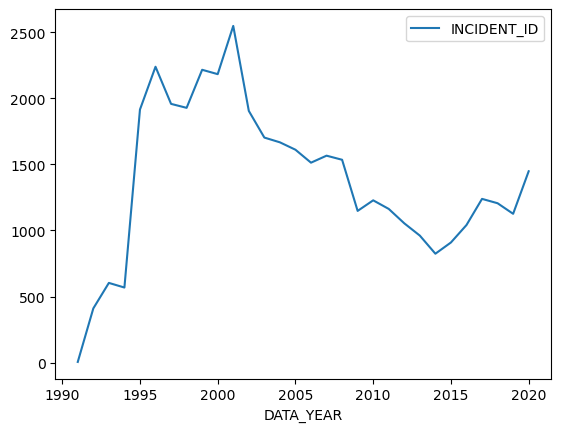

In [49]:
# # Check Single Selection
# hc_cases_geo_final.loc[hc_cases_geo_final['State'] == 'Florida',:].plot(x = 'DATA_YEAR', y = 'INCIDENT_ID')

# Check Multi Selection
hc_cases_geo_final.loc[hc_cases_geo_final['State'].isin(['Florida','California']),:].groupby('DATA_YEAR',as_index=False).sum('INCIDENT_ID').plot(x = 'DATA_YEAR', y = 'INCIDENT_ID')
plt.show()

##### Saving the visualization as a json specification file for publishing on web and more.

In [50]:
final_vis.save('group_24_final_project.json')

**Visualization:**
* Visualization 1 is a geographical representation of the total no. of hate crime cases across United States of America whereas Visualization 2 is a time series line plot of the total no. of cases over the years 1991-2020. 
* The color scale for Viz1 depicts the total no. of cases, the darker a state is marked, the more no. of hate crimes have been reported there.
* The user has the ability to select a specific state or multiple(use shift + click) and see the hate crime trend in those states for the years 1991-2020.
* We started with a dashboard to understand the offender race distribution across the US region and corresponding count of incidents over the years, but we felt it was more appropriate to go deeper and perform a state wise trend analysis instead.

**Contextual Datasets:**
* We found 2 contextual dataset that can be used(https://crime-data-explorer.fr.cloud.gov/pages/downloads)

	* Arrest Data - Reported Number of Arrests by Crime (1995-2016): Contains data on the national arrests made in the USA for various crimes. This dataset could be used in conjunction with our dashboard to understand how hate crime compares to other crimes within USA within the same time period
    
	* Cargo Theft (2013-2021): This dataset contains various types of cargo thefts committed in the USA and offender race information for the same. This would be helpful  to understand the correlation between the cargo thefts documents and the race of the offender across the states of USA


**Handling Large Data:**

* Since the dataset being used is too huge for github, we read in the data from web as a zip file, unpacked it and read csv using pandas.

* Since altair supports only 5000 rows of data, we grouped our data and selected columns required for plotting only. We parsed different datasets to the two viualizations and conected them through a multi selection object that returns the state name.

* Also, grouping and calculating in python instead of altair reduces the size of json specification file and makes the interactions faster and smoother.